In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
def plot_bar(data, freq, col):
    data = data[col].value_counts()
    df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
    agg_df_time = df_time.resample(freq).sum()
    g = sns.barplot(x=agg_df_time.index, y=agg_df_time['freq'])
    g.set_xticklabels(rotation=-75, labels = agg_df_time.index)
    g.set_title(col)
    plt.show()

In [3]:
def plot_gr(data, freq, col):
    data = data[col].value_counts()
    df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
    agg_df_time = df_time.resample(freq).sum()
    plt.plot(agg_df_time.index, agg_df_time.values)

In [4]:
def plot_bar_2(data, col):
    data = data[col].value_counts()
    axis_x = [x.days for x in data.sort_index().index]
    axis_y = data.sort_index().values
    g = sns.barplot(x=axis_x, y=axis_y)
    g.set_xticklabels(rotation=-75, labels = axis_x)
    g.set_title(col)
    plt.show()

# Импорт данных

In [5]:
support_tickets = pd.read_csv('support_tickets.csv')
support_tickets.shape

(397530, 7)

In [6]:
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [7]:
new_items_by_support_users = pd.read_csv('new_items_by_support_users.csv')
new_items_by_support_users.shape

(18559923, 7)

In [8]:
new_items_by_support_users.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [8]:
users_evaluation_of_satisfaction = pd.read_csv('users_evaluation_of_satisfaction.csv')
users_evaluation_of_satisfaction.shape

(217533, 2)

In [9]:
users_evaluation_of_satisfaction.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


# Оценки

In [10]:
users_evaluation_of_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [11]:
users_evaluation_of_satisfaction.dropna(inplace=True)

In [12]:
users_evaluation_of_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217414 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217414 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [13]:
users_evaluation_of_satisfaction.shape

(217414, 2)

In [14]:
users_evaluation_of_satisfaction['result_mentioned_by_user'].value_counts()

Отлично                 110097
Не удовлетворительно     45675
Хорошо                   31441
Нейтрально               17988
Удовлетворительно        12213
Name: result_mentioned_by_user, dtype: int64

In [15]:
temp = users_evaluation_of_satisfaction['request_id'].value_counts()
temp # ДУБЛИКАТЫ?

4d0c91c2-a8cc-450d-8a93-b93612ee7e71    8
aedc8ee8-6b7f-451e-bf84-361a69729f3e    7
089dd5b2-4704-4c01-88d6-ec48871f8194    7
425444b4-5a20-47e0-a259-99769a39aeb7    6
f4797035-53dc-45bf-86a7-158b4b49d87e    6
                                       ..
56094b1b-59d4-4b8b-b281-1d5e06661864    1
061d30d3-503b-48e8-8ef3-83bb3d33047c    1
2e3701dc-3f81-4128-8c5a-38cd61ba8ed2    1
6a7184ea-b2d2-4fa4-848a-c7b75724db93    1
66f04d82-67ca-4ae8-a5dc-cd3bc30fd1ca    1
Name: request_id, Length: 211069, dtype: int64

In [16]:
users_evaluation_of_satisfaction[users_evaluation_of_satisfaction['request_id'] == '089dd5b2-4704-4c01-88d6-ec48871f8194']

,request_id,result_mentioned_by_user
54605,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
94419,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
124150,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
146503,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
155521,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
184331,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно
206758,089dd5b2-4704-4c01-88d6-ec48871f8194,Не удовлетворительно


In [17]:
un_req_rev = set(users_evaluation_of_satisfaction['request_id'].unique()) # уникальные оцененные обращения 
len(un_req_rev)

211069

In [18]:
users_evaluation_of_satisfaction_nodulicates = users_evaluation_of_satisfaction.drop_duplicates()
users_evaluation_of_satisfaction_nodulicates.shape

(211069, 2)

# Обращения в поддержку

In [19]:
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [20]:
support_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397530 entries, 0 to 397529
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             397530 non-null  object
 1   ticket_category     397530 non-null  object
 2   ticket_subcategory  397530 non-null  object
 3   current_state       397530 non-null  object
 4   request_id          397530 non-null  object
 5   activity_start_dt   397530 non-null  object
 6   fact_reaction_dt    397530 non-null  object
dtypes: object(7)
memory usage: 21.2+ MB


In [22]:
support_tickets['current_state'].value_counts() # Все решены?

Решено    397530
Name: current_state, dtype: int64

In [23]:
len(support_tickets['user_id'].unique()) # уникальные пользователи

298957

In [24]:
un_req = set(support_tickets['request_id'].unique()) # уникальные обращения
len(un_req)

397530

In [25]:
len(un_req_rev.intersection(un_req)) # пересечение обращений и отзывов

120422

In [26]:
temp = support_tickets['user_id'].value_counts()
temp # самые популярные пользователи поддержки

46 564 750 136     1517
142 393 000 021     771
109 981 250 055     440
369 071 114         425
383 216 519         352
                   ... 
196 000 096           1
954 000 070           1
155 533 250 014       1
378 448 610           1
390 555 235           1
Name: user_id, Length: 298957, dtype: int64

In [27]:
temp.value_counts().sort_index(ascending=False) #кол-во обращений от одного и того же пользователя

1517         1
771          1
440          1
425          1
352          1
         ...  
5         1620
4         3534
3         9780
2        37542
1       244151
Name: user_id, Length: 71, dtype: int64

# Join обращений и отзывов

In [28]:
tickets = support_tickets.merge(users_evaluation_of_satisfaction_nodulicates, left_on='request_id', right_on='request_id', how='left')
tickets.shape

(397530, 8)

In [29]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,NaN
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,NaN
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,NaN
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,NaN


# Расчет CSAT

In [30]:
tickets['result_mentioned_by_user'].notna().sum() # сошлось +

120422

In [31]:
tickets['result_mentioned_by_user'].fillna('Нет отзыва', inplace=True)

In [32]:
temp = tickets['result_mentioned_by_user'].value_counts()
temp

Нет отзыва              277108
Отлично                  59750
Не удовлетворительно     24510
Хорошо                   18555
Нейтрально               10578
Удовлетворительно         7029
Name: result_mentioned_by_user, dtype: int64

In [33]:
all_rev = temp.sum() - temp['Нет отзыва']
all_rev # кол-во обращений с отзывами

120422

In [34]:
good_plus = temp['Хорошо'] + temp['Отлично']
good_plus

78305

In [35]:
CSAT = good_plus/all_rev * 100
CSAT

65.0254936805567

# Время ответа

In [36]:
tickets['activity_start_dt'] = tickets['activity_start_dt'].apply(pd.Timestamp)
tickets['fact_reaction_dt'] = tickets['fact_reaction_dt'].apply(pd.Timestamp)

In [37]:
wrong_reaction_time_index = tickets[tickets['fact_reaction_dt'] < tickets['activity_start_dt']].index

In [38]:
tickets.drop(wrong_reaction_time_index, inplace=True)
tickets.shape

(397522, 8)

In [39]:
tickets['time_answer'] = tickets['fact_reaction_dt'] - tickets['activity_start_dt']

In [40]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00


In [41]:
tickets[tickets['activity_start_dt'] < '2015-09-01'] # Ответы с сентября

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer
11409,385 723 328,Технические вопросы,Подтверждение телефонного номера,Решено,b661908c-fc53-46dd-8fb0-5460517e0e16,2015-08-28 13:33:00,2015-09-03 11:15:00,Отлично,5 days 21:42:00
49929,113 242 750 044,Платные услуги и сервисы,Оплата и применение услуг,Решено,8ac280d7-bd3c-4884-b277-2112a98214e0,2015-08-31 21:05:00,2015-09-04 10:20:00,Нет отзыва,3 days 13:15:00
82916,51 951 000 089,"Магазины, Автозагрузка и юридические лица",Другие вопросы и консультации,Решено,aef69e22-f72c-4ee0-a9a3-793b66e2e98b,2015-08-31 17:19:00,2015-09-01 08:23:00,Нет отзыва,0 days 15:04:00
144509,1 502 913,Технические вопросы,Вход в личный кабинет,Решено,8a2bb4e6-fc44-4f35-a88a-cfef0ad4efff,2015-08-14 18:34:00,2015-09-03 14:56:00,Нет отзыва,19 days 20:22:00
162993,77 919 000 022,"Магазины, Автозагрузка и юридические лица",Автоматическая загрузка объявлений,Решено,3c46e28a-9eb0-4464-a254-912056281e13,2015-08-31 16:02:00,2015-09-01 08:31:00,Отлично,0 days 16:29:00
193716,7 055 000 169,Рекламные сервисы Avito,Оплата компании Avito Промо,Решено,56c99d07-6b7e-4b0a-a220-6a7445321785,2015-08-31 17:03:00,2015-09-02 13:30:00,Нет отзыва,1 days 20:27:00
277210,180 250 121,Платные услуги и сервисы,Оплата и применение услуг,Решено,31430d87-cfb6-48ca-b88f-64ee6d9aa056,2015-08-18 15:50:00,2015-09-02 11:36:00,Нет отзыва,14 days 19:46:00


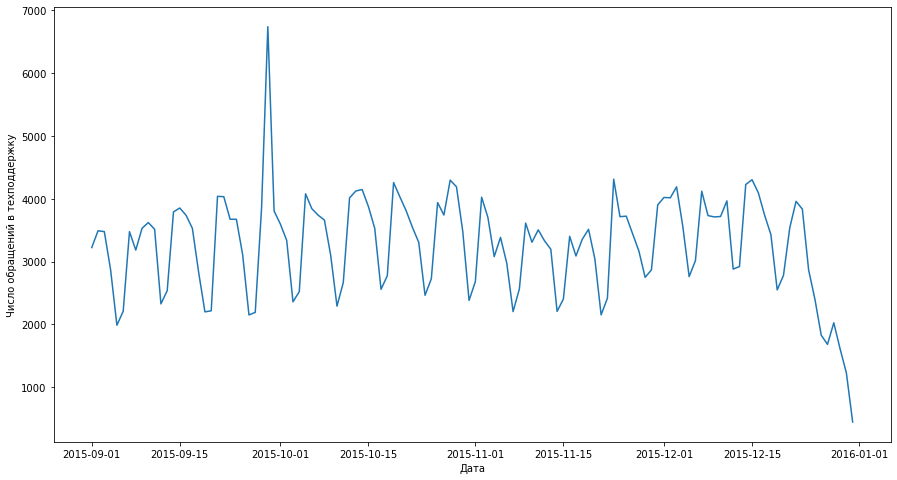

In [63]:
data = tickets[tickets['activity_start_dt']>='2015-09-01']['activity_start_dt'].value_counts()
df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
agg_df_time = df_time.resample('D').sum()
fig, ax = plt.subplots()
ax.plot(agg_df_time.index, agg_df_time.values)
ax.set_xlabel('Дата')
ax.set_ylabel('Число обращений в техподдержку')
plt.yticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
plt.show()

In [118]:
data = tickets[tickets['fact_reaction_dt']>='2015-09-01']['fact_reaction_dt'].value_counts()
df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
first_part = df_time.resample('M').sum()

In [119]:
#count_days = pd.read_csv('count_days.csv')
count_days

,count
2015-09-30,30
2015-10-31,31
2015-11-30,30
2015-12-31,31
2016-01-31,1


In [124]:
need_coef =[]
for i in zip(first_part.values,count_days.values):
    need_coef.append(i[0][0]/i[1][0])

In [137]:
need_coef

[3139.7, 3276.548387096774, 3201.3, 3410.2903225806454]

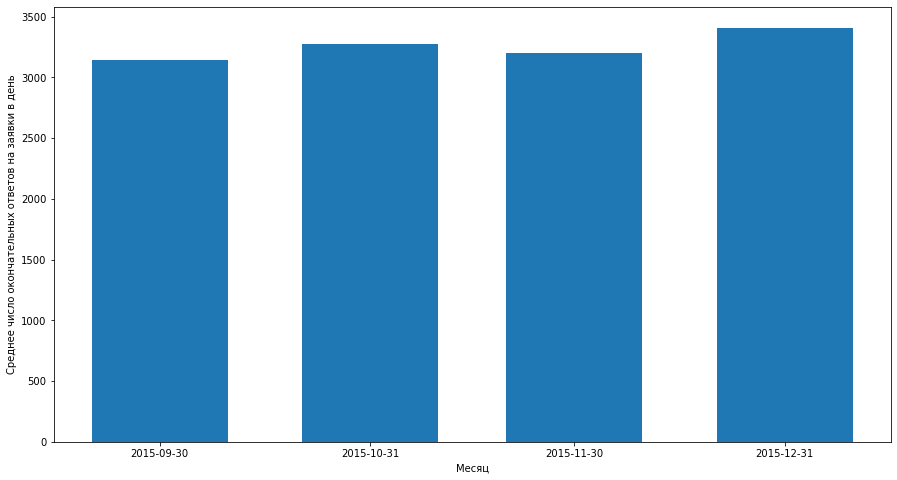

In [243]:
fig, ax = plt.subplots()
ax.bar(first_part.index, need_coef, width=20)
ax.set_xlabel('Месяц')
ax.set_ylabel('Среднее число окончательных ответов на заявки в день')
plt.xticks(first_part.index)
plt.show()

In [253]:
pd.DataFrame(data=need_coef, index=list(map(str,list(good_df.index))), columns=['count_avg'])

,count_avg
2015-09,3139.700000
2015-10,3276.548387
2015-11,3201.300000
2015-12,3410.290323


# Общее количество заявок в день — Number of Support Tickets

In [138]:
tickets['activity_start_dt'].dt.round('D').value_counts().mean()

3154.936507936508

In [139]:
tickets['time_answer_days'] = tickets['fact_reaction_dt'].dt.round('D') - tickets['activity_start_dt'].dt.round('D')

In [140]:
tickets

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,hour_of_start,array_count_tickets,is_holyday,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7 days,22,2,False,0,0,0,0,0,1,1.128340
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5 days,8,1,False,0,0,0,0,0,0,0.713697
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9 days,19,1,False,0,0,0,0,0,0,1.878974
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7 days,17,1,False,0,0,0,0,0,0,1.432448
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2 days,10,1,False,0,0,0,0,0,0,-0.208085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397517,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,e0eb978c-282c-4b9a-9998-f1fa688a4f71,2015-09-29 07:09:00,2015-09-29 13:02:00,Нет отзыва,0 days 05:53:00,1 days,7,4,False,0,0,0,0,0,3,-0.462617
397518,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,939ef980-4b59-40dc-9d29-66b47ba77fb6,2015-09-25 13:28:00,2015-09-29 16:38:00,Нет отзыва,4 days 03:10:00,4 days,13,3,False,0,0,0,0,0,2,0.517849
397519,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,f558d9eb-b278-4d74-a63a-b35674f5a672,2015-10-09 05:24:00,2015-10-09 05:29:00,Нет отзыва,0 days 00:05:00,0 days,5,5,False,0,0,0,0,0,4,-0.523578
397520,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,9359f267-bc96-406d-b054-80cbdf761e11,2015-09-04 05:38:00,2015-09-04 05:43:00,Нет отзыва,0 days 00:05:00,0 days,5,1,False,0,0,0,0,0,0,-0.523578


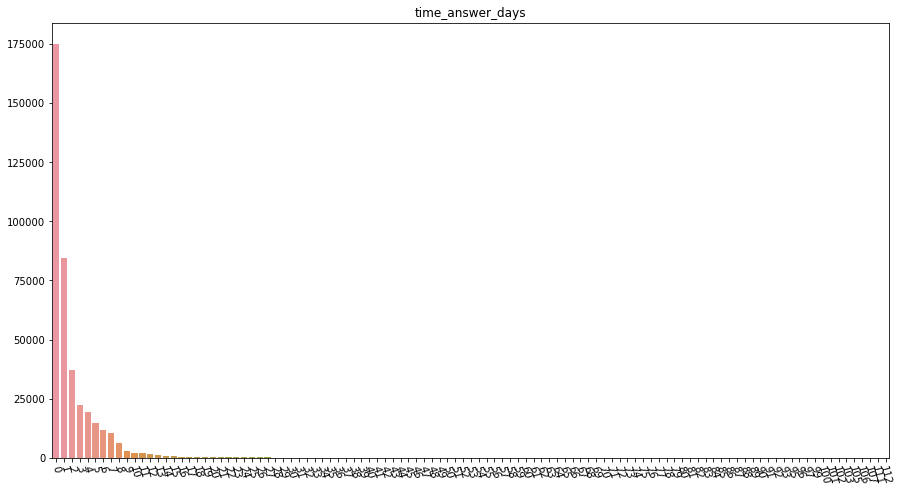

In [141]:
plot_bar_2(tickets, 'time_answer_days')

In [142]:
temp = tickets['time_answer']
temp

0        6 days 13:15:00
1        4 days 21:48:00
2        9 days 12:40:00
3        7 days 18:11:00
4        1 days 06:06:00
               ...      
397517   0 days 05:53:00
397518   4 days 03:10:00
397519   0 days 00:05:00
397520   0 days 00:05:00
397521   1 days 07:44:00
Name: time_answer, Length: 397522, dtype: timedelta64[ns]

In [143]:
temp.value_counts().sort_index(ascending=False)

111 days 20:35:00       1
111 days 18:36:00       1
106 days 16:55:00       1
106 days 10:56:00       1
104 days 12:13:00       1
                     ... 
0 days 00:04:00      3126
0 days 00:03:00      3421
0 days 00:02:00      3405
0 days 00:01:00      2056
0 days 00:00:00       471
Name: time_answer, Length: 22753, dtype: int64

# Среднее время ответа — Average Reply Time (ART)

In [144]:
temp.describe()

count                    397522
mean     2 days 01:53:51.223278
std      3 days 23:08:31.221110
min             0 days 00:00:00
25%             0 days 01:45:00
50%             0 days 16:52:00
75%             2 days 13:41:00
max           111 days 20:35:00
Name: time_answer, dtype: object

# Периоды

In [21]:
tickets = pd.read_csv('tickets.csv')

tickets['activity_start_dt'] = tickets['activity_start_dt'].apply(lambda x: pd.Timestamp(x))
tickets['fact_reaction_dt'] = tickets['fact_reaction_dt'].apply(lambda x: pd.Timestamp(x))
tickets['time_answer'] = tickets['time_answer'].apply(lambda x: pd.Timedelta(x))
tickets['time_answer_days'] = tickets['time_answer_days'].apply(lambda x: pd.Timedelta(x).days)
tickets['activity_start_dt'] = tickets['activity_start_dt'].apply(lambda x: pd.Timestamp(x))
tickets['is_holyday'] = tickets['activity_start_dt'].apply(lambda x: x.dayofweek > 5)
count_score = pd.read_csv('count_score.csv')
tickets[count_score.columns] = count_score
tickets.shape

(397522, 19)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
seconds = np.array(tickets['time_answer'].apply(lambda x: x.total_seconds())).reshape(-1,1)
scaler.fit(seconds)
standart_feature = scaler.transform(seconds)
tickets['time_answer_standart'] = standart_feature

In [23]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,hour_of_start,array_count_tickets,is_holyday,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,22,2,False,0,0,0,0,0,1,1.128340
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5,8,1,False,0,0,0,0,0,0,0.713697
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9,19,1,False,0,0,0,0,0,0,1.878974
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7,17,1,False,0,0,0,0,0,0,1.432448
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2,10,1,False,0,0,0,0,0,0,-0.208085


In [24]:
tickets['month_year']=tickets['activity_start_dt'].dt.to_period('M')

In [25]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,...,array_count_tickets,is_holyday,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart,month_year
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,...,2,False,0,0,0,0,0,1,1.128340,2015-11
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5,...,1,False,0,0,0,0,0,0,0.713697,2015-12
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9,...,1,False,0,0,0,0,0,0,1.878974,2015-12
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7,...,1,False,0,0,0,0,0,0,1.432448,2015-12
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2,...,1,False,0,0,0,0,0,0,-0.208085,2015-12


In [26]:
temp = tickets[tickets['activity_start_dt']>='2015-09-01'][['time_answer_standart', 'month_year']].groupby('month_year').mean()
temp

,time_answer_standart
month_year,
2015-09,-0.216363
2015-10,0.083962
2015-11,0.122551
2015-12,0.008252


In [27]:
temp['time_answer_avg']=temp['time_answer_standart'].apply(lambda x: pd.Timedelta(seconds=scaler.inverse_transform([x])[0]))

In [28]:
temp

,time_answer_standart,time_answer_avg
month_year,,
2015-09,-0.216363,1 days 05:18:44.703729
2015-10,0.083962,2 days 09:53:09.128449
2015-11,0.122551,2 days 13:33:26.434034
2015-12,0.008252,2 days 02:40:57.590022


In [29]:
temp['time_answer_avg'].values

array([105524703729000, 208389128449000, 221606434034000, 182457590022000],
      dtype='timedelta64[ns]')

In [30]:
temp

,time_answer_standart,time_answer_avg
month_year,,
2015-09,-0.216363,1 days 05:18:44.703729
2015-10,0.083962,2 days 09:53:09.128449
2015-11,0.122551,2 days 13:33:26.434034
2015-12,0.008252,2 days 02:40:57.590022


In [31]:
temp['total_hour']=temp['time_answer_avg'].apply(lambda x: x.total_seconds()/60/60)

In [32]:
temp['total_hour'].values

array([29.3124177 , 57.88586901, 61.55734279, 50.68266389])

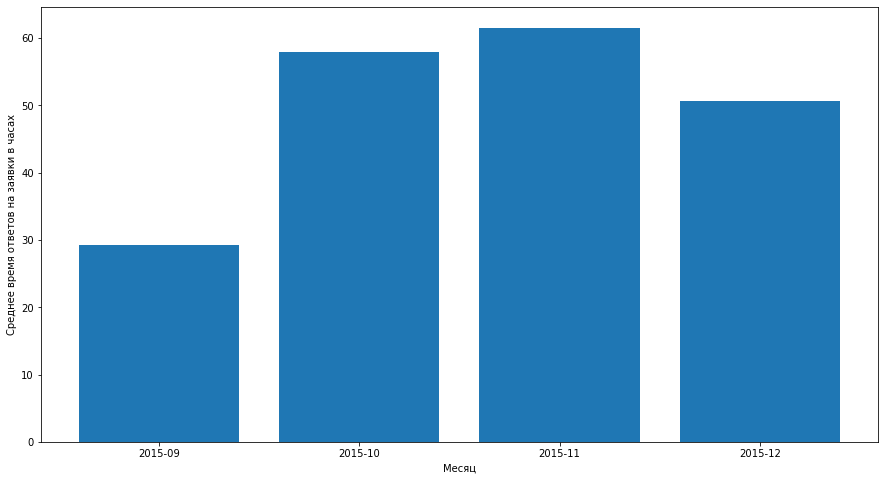

In [33]:
fig, ax = plt.subplots()
ax.bar(list(map(str,list(temp.index))), temp['total_hour'].values)
ax.set_xlabel('Месяц')
ax.set_ylabel('Среднее время ответов на заявки в часах')
plt.xticks(list(map(str,list(temp.index))))
plt.show()

In [252]:
temp[['total_hour']]

,total_hour
month_year,
2015-09,29.312418
2015-10,57.885869
2015-11,61.557343
2015-12,50.682664


# + category

In [35]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,...,array_count_tickets,is_holyday,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart,month_year
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,...,2,False,0,0,0,0,0,1,1.128340,2015-11
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5,...,1,False,0,0,0,0,0,0,0.713697,2015-12
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9,...,1,False,0,0,0,0,0,0,1.878974,2015-12
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7,...,1,False,0,0,0,0,0,0,1.432448,2015-12
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2,...,1,False,0,0,0,0,0,0,-0.208085,2015-12


In [137]:
temp = tickets[tickets['activity_start_dt']>='2015-09-01'][['time_answer_standart', 'month_year', 'ticket_category']].groupby(['month_year', 'ticket_category']).mean()
#temp

In [138]:
temp['time_answer_avg']=temp['time_answer_standart'].apply(lambda x: pd.Timedelta(seconds=scaler.inverse_transform([x])[0]))

In [139]:
temp['total_hour']=temp['time_answer_avg'].apply(lambda x: x.total_seconds()/60/60)

In [140]:
temp[['total_hour']]

total_hour
month_year ticket_category                                      
2015-09    Безопасность на Avito                       22.820971
           Блокировки и отклонения                     26.963143
           Магазины, Автозагрузка и юридические лица   42.384318
           Мобильный Avito                             41.563850
           Платные услуги и сервисы                    42.757551
           Работа с объявлениями и личным кабинетом    26.454631
           Рекламные сервисы Avito                     41.513010
           Технические вопросы                         37.966041
2015-10    Безопасность на Avito                       23.177660
           Блокировки и отклонения                     45.549426
           Магазины, Автозагрузка и юридические лица   58.198239
           Мобильный Avito                            108.554784
           Платные услуги и сервисы                   106.340325
           Работа с объявлениями и личным кабинетом    65.953433
           Рекламные сервисы Avito                     53.955072
           Технические вопросы                         79.863718
2015-11    Безопасность на Avito                       17.700822
           Блокировки и отклонения                     38.553786
           Магазины, Автозагрузка и юридические лица   42.087961
           Мобильный Avito                            137.737221
           Платные услуги и сервисы                   140.967716
           Работа с объявлениями и личным кабинетом    54.939942
           Рекламные сервисы Avito                     47.795631
           Технические вопросы                        105.004331
2015-12    Безопасность на Avito                       16.455434
           Блокировки и отклонения                     45.121346
           Магазины, Автозагрузка и юридические лица   26.332327
           Мобильный Avito                             85.962042
           Платные услуги и сервисы                    78.835762
           Работа с объявлениями и личным кабинетом    58.111975
           Рекламные сервисы Avito                     29.384649
           Технические вопросы                         56.366853

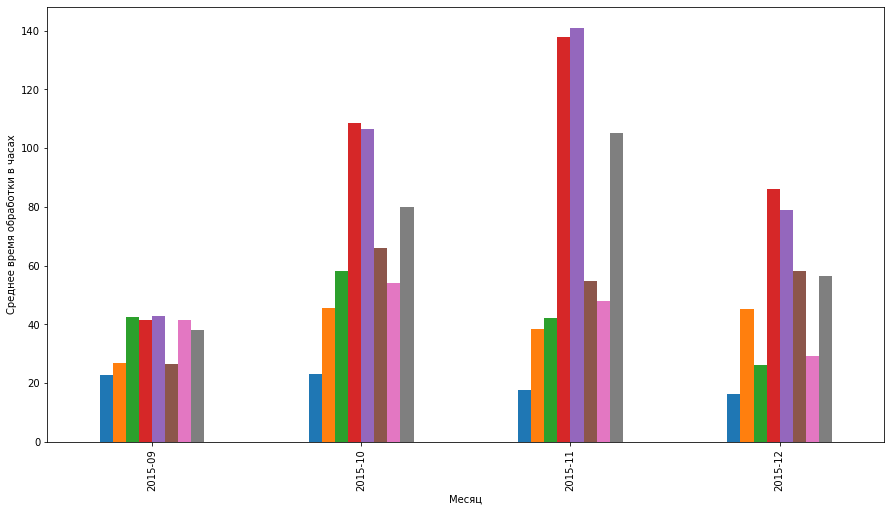

In [141]:
ax = temp[['total_hour']].unstack().plot(kind='bar', legend=False)
#plt.setp(ax.get_legend().get_texts(), fontsize='10')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Месяц', ylabel='Среднее время обработки в часах')
plt.show()

# число заявок + категория

In [109]:
temp = tickets[tickets['activity_start_dt']>='2015-09-01'][['ticket_category','month_year', 'request_id']].groupby(['month_year', 'ticket_category']).count()

In [112]:
count_days = pd.read_csv('count_days.csv')
count_days.head()

,Unnamed: 0,count
0,2015-09-30,30
1,2015-10-31,31
2,2015-11-30,30
3,2015-12-31,31
4,2016-01-31,1


In [115]:
count_days.columns = ['month', 'count_days']

In [116]:
count_days

,month,count_days
0,2015-09-30,30
1,2015-10-31,31
2,2015-11-30,30
3,2015-12-31,31
4,2016-01-31,1


In [118]:
count_days['month_year']=count_days['month'].apply(lambda x: pd.Timestamp(x)).dt.to_period('M')

In [121]:
count_days

,month,count_days,month_year
0,2015-09-30,30,2015-09
1,2015-10-31,31,2015-10
2,2015-11-30,30,2015-11
3,2015-12-31,31,2015-12
4,2016-01-31,1,2016-01


In [124]:
temp.unstack()

request_id                          \
ticket_category Безопасность на Avito Блокировки и отклонения   
month_year                                                      
2015-09                          2215                   57524   
2015-10                          3164                   59742   
2015-11                          3732                   45162   
2015-12                          3889                   47584   

                                                                           \
ticket_category Магазины, Автозагрузка и юридические лица Мобильный Avito   
month_year                                                                  
2015-09                                               694             361   
2015-10                                              1126             425   
2015-11                                              1329             403   
2015-12                                              1839             400   

                                          \
ticket_category Платные услуги и сервисы   
month_year                                 
2015-09                             5103   
2015-10                             7914   
2015-11                             7558   
2015-12                             7740   

                                                          \
ticket_category Работа с объявлениями и личным кабинетом   
month_year                                                 
2015-09                                            19192   
2015-10                                            20480   
2015-11                                            19074   
2015-12                                            17407   

                                                             
ticket_category Рекламные сервисы Avito Технические вопросы  
month_year                                                   
2015-09                             825               12965  
2015-10                             838               12719  
2015-11                             866               16933  
2015-12                             849               17463

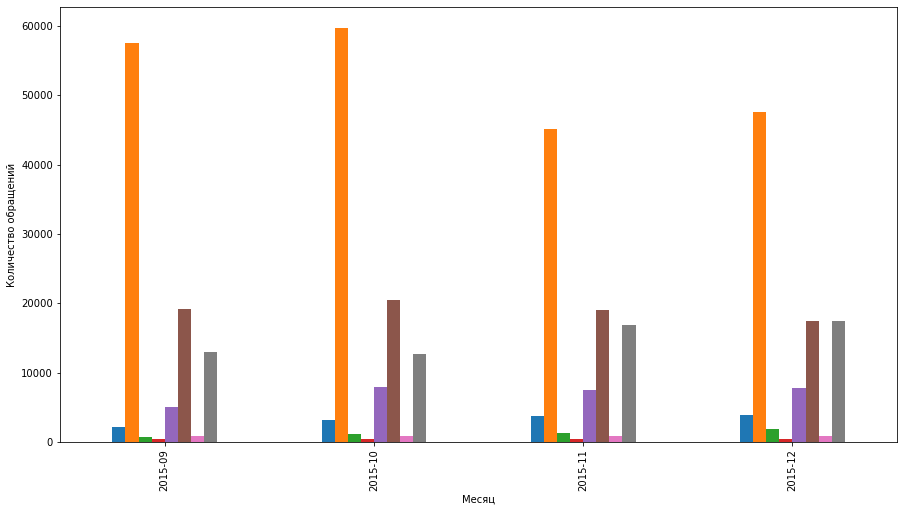

In [129]:
ax = temp.unstack().plot(kind='bar', legend=False)
#plt.setp(ax.get_legend().get_texts(), fontsize='10')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Месяц', ylabel='Количество обращений')
plt.show()

In [130]:
temp

request_id
month_year ticket_category                                      
2015-09    Безопасность на Avito                            2215
           Блокировки и отклонения                         57524
           Магазины, Автозагрузка и юридические лица         694
           Мобильный Avito                                   361
           Платные услуги и сервисы                         5103
           Работа с объявлениями и личным кабинетом        19192
           Рекламные сервисы Avito                           825
           Технические вопросы                             12965
2015-10    Безопасность на Avito                            3164
           Блокировки и отклонения                         59742
           Магазины, Автозагрузка и юридические лица        1126
           Мобильный Avito                                   425
           Платные услуги и сервисы                         7914
           Работа с объявлениями и личным кабинетом        20480
           Рекламные сервисы Avito                           838
           Технические вопросы                             12719
2015-11    Безопасность на Avito                            3732
           Блокировки и отклонения                         45162
           Магазины, Автозагрузка и юридические лица        1329
           Мобильный Avito                                   403
           Платные услуги и сервисы                         7558
           Работа с объявлениями и личным кабинетом        19074
           Рекламные сервисы Avito                           866
           Технические вопросы                             16933
2015-12    Безопасность на Avito                            3889
           Блокировки и отклонения                         47584
           Магазины, Автозагрузка и юридические лица        1839
           Мобильный Avito                                   400
           Платные услуги и сервисы                         7740
           Работа с объявлениями и личным кабинетом        17407
           Рекламные сервисы Avito                           849
           Технические вопросы                             17463

# общее кол-во заявок

In [131]:
temp = tickets[tickets['activity_start_dt']>='2015-09-01'][['month_year', 'request_id']].groupby(['month_year']).count()

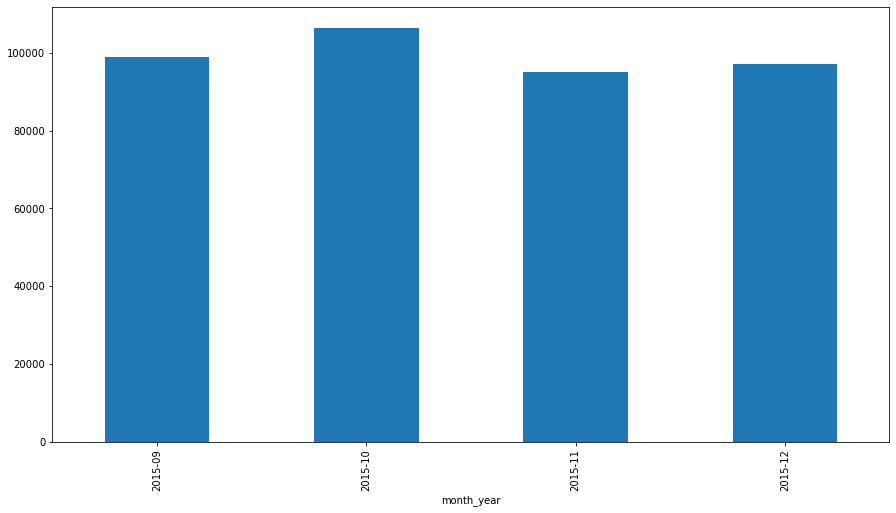

In [135]:
temp.plot(kind='bar', legend=False)
ax.set(xlabel='Месяц', ylabel='Количество обращений')
plt.show()

In [136]:
temp

,request_id
month_year,
2015-09,98879
2015-10,106408
2015-11,95057
2015-12,97171


# CSAT

In [142]:
tickets['month_year_answer']=tickets['fact_reaction_dt'].dt.to_period('M')

In [186]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,...,is_holyday,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart,month_year,month_year_answer
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,...,False,0,0,0,0,0,1,1.128340,2015-11,2015-12
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5,...,False,0,0,0,0,0,0,0.713697,2015-12,2015-12
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9,...,False,0,0,0,0,0,0,1.878974,2015-12,2015-12
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7,...,False,0,0,0,0,0,0,1.432448,2015-12,2015-12
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2,...,False,0,0,0,0,0,0,-0.208085,2015-12,2015-12


In [187]:
group = tickets[tickets['activity_start_dt']>='2015-09-01'][['result_mentioned_by_user', 'month_year', 'request_id']].groupby(['month_year','result_mentioned_by_user']).count()

In [188]:
good_index = (tickets['activity_start_dt']>='2015-09-01') & ((tickets['result_mentioned_by_user'] == 'Хорошо') | (tickets['result_mentioned_by_user'] == 'Отлично'))

In [189]:
good_df = tickets[good_index][['month_year', 'request_id']].groupby(['month_year']).count()

In [190]:
all_index = (tickets['activity_start_dt']>='2015-09-01') & (tickets['result_mentioned_by_user'] != 'Нет отзыва')

In [191]:
all_df = tickets[all_index][['month_year', 'request_id']].groupby(['month_year']).count()

In [192]:
good_df

,request_id
month_year,
2015-09,20470
2015-10,20342
2015-11,18581
2015-12,18909


In [193]:
all_df

,request_id
month_year,
2015-09,29854
2015-10,32060
2015-11,28383
2015-12,30121


In [194]:
SCAT = []
for i in good_df.index:
    SCAT.append(good_df[str(i)].values[0][0]/all_df[str(i)].values[0][0]*100)

In [195]:
SCAT

[68.56702619414484, 63.44978165938865, 65.46524327942784, 62.77680023903589]

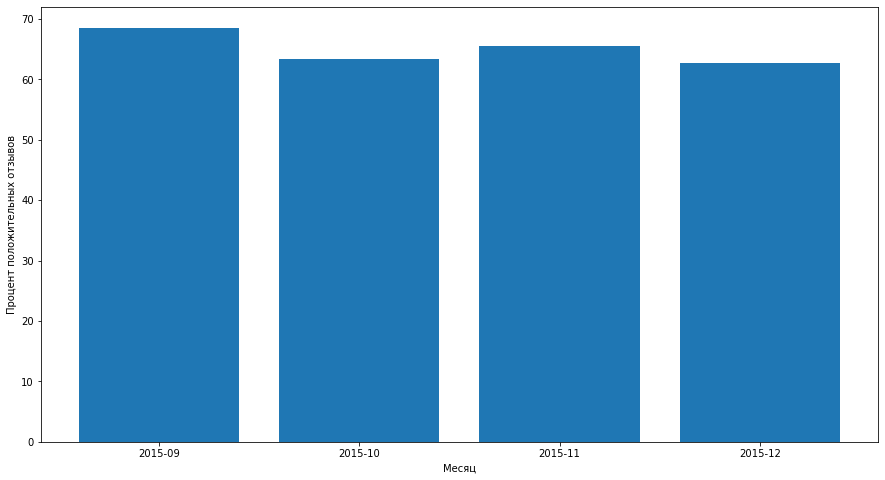

In [196]:
fig, ax = plt.subplots()
ax.bar(list(map(str,list(good_df.index))), SCAT)
ax.set_xlabel('Месяц')
ax.set_ylabel('Процент положительных отзывов')
plt.xticks(list(map(str,list(good_df.index))))
plt.show()

In [197]:
pd.DataFrame(data=SCAT, index=list(map(str,list(good_df.index))), columns=['percent_of_positive'])

,percent_of_positive
2015-09,68.567026
2015-10,63.449782
2015-11,65.465243
2015-12,62.776800


# + category

In [198]:
good_index = (tickets['activity_start_dt']>='2015-09-01') & ((tickets['result_mentioned_by_user'] == 'Хорошо') | (tickets['result_mentioned_by_user'] == 'Отлично'))

In [199]:
good_df = tickets[good_index][['month_year', 'ticket_category', 'request_id']].groupby(['month_year','ticket_category']).count()

In [200]:
all_df = tickets[all_index][['month_year', 'ticket_category', 'request_id']].groupby(['month_year', 'ticket_category']).count()

In [201]:
temp = good_df.reset_index()

In [202]:
temp1 = good_df.reset_index()['request_id'] / all_df.reset_index()['request_id']*100

In [203]:
temp['positive'] = temp1

In [204]:
temp = temp[['month_year', 'ticket_category', 'positive']].groupby(['month_year', 'ticket_category']).max()

In [205]:
temp

positive
month_year ticket_category                                     
2015-09    Безопасность на Avito                      64.367816
           Блокировки и отклонения                    65.889867
           Магазины, Автозагрузка и юридические лица  69.302326
           Мобильный Avito                            75.609756
           Платные услуги и сервисы                   58.884565
           Работа с объявлениями и личным кабинетом   75.068046
           Рекламные сервисы Avito                    48.571429
           Технические вопросы                        76.386233
2015-10    Безопасность на Avito                      65.707134
           Блокировки и отклонения                    59.017740
           Магазины, Автозагрузка и юридические лица  65.757576
           Мобильный Avito                            73.684211
           Платные услуги и сервисы                   56.804998
           Работа с объявлениями и личным кабинетом   70.261657
           Рекламные сервисы Avito                    46.330275
           Технические вопросы                        76.800771
2015-11    Безопасность на Avito                      62.131519
           Блокировки и отклонения                    59.139291
           Магазины, Автозагрузка и юридические лица  65.552699
           Мобильный Avito                            67.605634
           Платные услуги и сервисы                   51.246776
           Работа с объявлениями и личным кабинетом   72.324793
           Рекламные сервисы Avito                    53.846154
           Технические вопросы                        79.380429
2015-12    Безопасность на Avito                      65.625000
           Блокировки и отклонения                    53.428054
           Магазины, Автозагрузка и юридические лица  64.117647
           Мобильный Avito                            75.280899
           Платные услуги и сервисы                   58.025789
           Работа с объявлениями и личным кабинетом   72.964489
           Рекламные сервисы Avito                    60.743802
           Технические вопросы                        78.757891

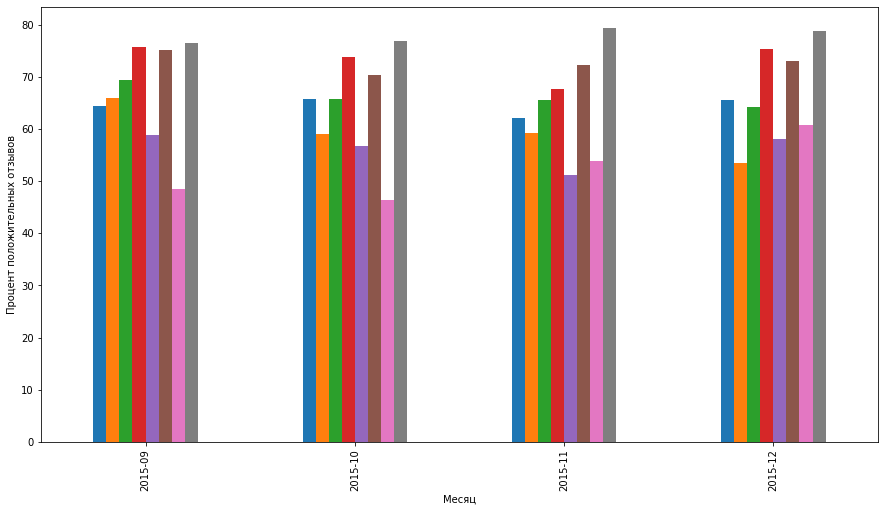

In [206]:
ax = temp.unstack().plot(kind='bar', legend=False)
#plt.setp(ax.get_legend().get_texts(), fontsize='10')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Месяц', ylabel='Процент положительных отзывов')
plt.show()

# With predict

In [207]:
from joblib import dump, load
clf = load('rf4.joblib')

In [270]:
tickets_binary = pd.read_csv('tickets_binary_full_another.csv')
tickets_binary.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,...,Пополнение кошелька,Проблема с отправкой сообщений,Регистрация учетной записи,Редактирование объявления,Реквизиты организации,Снятие объявления с публикации,Создание кампании Avito Контекст,Создание кампании Avito Промо,Удаление учетной записи,Управление списками объявлений
0,0,0,0,0,0,0,0,0,1,1.128340,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,-1,0.713697,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,-1,1.878974,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,-1,1.432448,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,-1,-0.208085,...,0,0,0,0,0,0,0,0,0,0


In [271]:
X_control = tickets_binary[tickets_binary['result_mentioned_by_user'] == -1].drop('result_mentioned_by_user', axis=1)

In [210]:
#y_pred = clf.predict(X_control)

In [272]:
y_proba = clf.predict_proba(X_control)

In [273]:
temp = [i for i in zip(y_proba[:,0], y_proba[:,1], y_pred)]

In [274]:
df = pd.DataFrame(temp, columns=['proba_0' , 'proba_1', 'y_pred'])
df.head()

,proba_0,proba_1,y_pred
0,0.353333,0.646667,1
1,0.410000,0.590000,1
2,0.370000,0.630000,1
3,0.366667,0.633333,1
4,0.023333,0.976667,1


In [275]:
df['predict_80_percent'] = np.copy(df['y_pred'])

In [276]:
df['diff'] = abs(df['proba_0'] - df['proba_1'])

In [277]:
df.head()

,proba_0,proba_1,y_pred,predict_80_percent,diff
0,0.353333,0.646667,1,1,0.293333
1,0.410000,0.590000,1,1,0.180000
2,0.370000,0.630000,1,1,0.260000
3,0.366667,0.633333,1,1,0.266667
4,0.023333,0.976667,1,1,0.953333


In [278]:
df.loc[df[df['diff'] < 0.99].index] = -1

In [279]:
df['predict_80_percent'].value_counts()

-1    260894
 1     15117
 0      1091
Name: predict_80_percent, dtype: int64

In [280]:
df[df['predict_80_percent'].isna()]

,proba_0,proba_1,y_pred,predict_80_percent,diff


In [281]:
predict_80_percent = df['predict_80_percent']

In [282]:
tickets_binary.index

RangeIndex(start=0, stop=397522, step=1)

In [283]:
tickets.index

RangeIndex(start=0, stop=397522, step=1)

In [284]:
predict_80_percent.value_counts()

-1    260894
 1     15117
 0      1091
Name: predict_80_percent, dtype: int64

In [285]:
X_control['result_mentioned_by_user']=list(predict_80_percent)

In [286]:
X_control['result_mentioned_by_user'].value_counts()

-1    260894
 1     15117
 0      1091
Name: result_mentioned_by_user, dtype: int64

In [287]:
X_control['result_mentioned_by_user'] = X_control['result_mentioned_by_user'].apply(lambda x: int(x))

In [288]:
X_control.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,time_answer,hour_of_start,...,Проблема с отправкой сообщений,Регистрация учетной записи,Редактирование объявления,Реквизиты организации,Снятие объявления с публикации,Создание кампании Avito Контекст,Создание кампании Avito Промо,Удаление учетной записи,Управление списками объявлений,result_mentioned_by_user
1,0,0,0,0,0,0,0,0,0.713697,8,...,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,1.878974,19,...,0,0,0,0,0,0,0,0,0,-1
3,0,0,0,1,0,0,0,0,1.432448,17,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,0,0,0,-0.208085,10,...,0,0,0,0,0,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,-0.391670,6,...,0,0,0,0,0,0,0,0,0,-1


In [289]:
X_control['result_mentioned_by_user'].value_counts()

-1    260894
 1     15117
 0      1091
Name: result_mentioned_by_user, dtype: int64

In [290]:
to_binary ={'Хорошо': 'Положительный', 1: 'Положительный', 'Отлично': 'Положительный', 'Нейтрально': 'неположительный',
       'Не удовлетворительно': 'неположительный', 'Удовлетворительно': 'неположительный', 0: 'неположительный', -1:'Нет отзыва'}

In [291]:
tickets['negative'] = np.copy(tickets['result_mentioned_by_user'])

In [292]:
tickets['negative'].iloc[X_control.index] = np.copy(X_control['result_mentioned_by_user'])

c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [293]:
tickets['negative']=tickets['negative'].apply(lambda x: to_binary[x])

In [294]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,...,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart,month_year,month_year_answer,negative
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,...,0,0,0,0,0,1,1.128340,2015-11,2015-12,Положительный
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5,...,0,0,0,0,0,0,0.713697,2015-12,2015-12,Нет отзыва
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9,...,0,0,0,0,0,0,1.878974,2015-12,2015-12,Нет отзыва
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7,...,0,0,0,0,0,0,1.432448,2015-12,2015-12,Нет отзыва
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2,...,0,0,0,0,0,0,-0.208085,2015-12,2015-12,Нет отзыва


In [295]:
tickets['negative'].value_counts()

Нет отзыва         260894
Положительный       93421
неположительный     43207
Name: negative, dtype: int64

In [296]:
tickets['result_mentioned_by_user'].value_counts()

Нет отзыва              277102
Отлично                  59749
Не удовлетворительно     24509
Хорошо                   18555
Нейтрально               10578
Удовлетворительно         7029
Name: result_mentioned_by_user, dtype: int64

In [297]:
good_index = (tickets['activity_start_dt']>='2015-09-01') & (tickets['negative'] == 'Положительный')
good_df = tickets[good_index][['month_year', 'request_id']].groupby(['month_year']).count()

In [298]:
all_index = (tickets['activity_start_dt']>='2015-09-01') & (tickets['negative'] != 'Нет отзыва')
all_df = tickets[all_index][['month_year', 'request_id']].groupby(['month_year']).count()

In [299]:
good_df

,request_id
month_year,
2015-09,26287
2015-10,23926
2015-11,21461
2015-12,21745


In [300]:
SCAT = []
for i in good_df.index:
    SCAT.append(good_df[str(i)].values[0][0]/all_df[str(i)].values[0][0]*100)

In [301]:
SCAT

[73.3761339846476, 66.42052079284882, 68.05670070400203, 65.40833208001203]

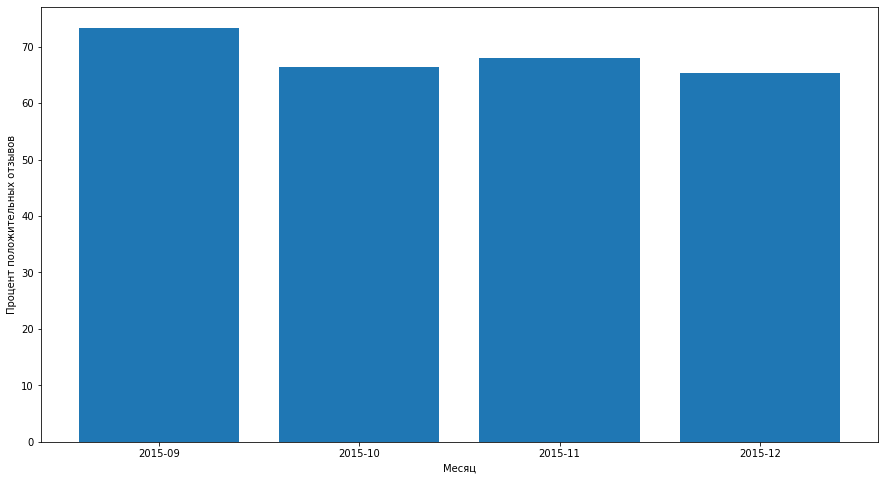

In [302]:
fig, ax = plt.subplots()
ax.bar(list(map(str,list(good_df.index))), SCAT)
ax.set_xlabel('Месяц')
ax.set_ylabel('Процент положительных отзывов')
plt.xticks(list(map(str,list(good_df.index))))
plt.show()

In [303]:
index_add = (tickets['result_mentioned_by_user'] == 'Нет отзыва') & (tickets['negative'] != 'Нет отзыва')

In [304]:
pd.DataFrame(data=SCAT, index=list(map(str,list(good_df.index))), columns=['percent_of_positive'])

,percent_of_positive
2015-09,73.376134
2015-10,66.420521
2015-11,68.056701
2015-12,65.408332


In [258]:
tickets[tickets['result_mentioned_by_user'] == 'Нет отзыва'][['month_year_answer','request_id']].groupby('month_year_answer').count()

,request_id
month_year_answer,
2015-09,66558
2015-10,70370
2015-11,67555
2015-12,72619


In [260]:
tickets[index_add][['month_year','request_id','negative']].groupby(['month_year', 'negative']).count()

request_id
month_year negative                   
2015-09    Положительный          5817
           неположительный         154
2015-10    Положительный          3584
           неположительный         378
2015-11    Положительный          2880
           неположительный         271
2015-12    Положительный          2836
           неположительный         288

# Оценка средней лояльности пользователей по кол-ву отзывов

In [309]:
to_scale ={'Хорошо': 4, 'Отлично': 5, 'Нейтрально': 3,
       'Не удовлетворительно': 1, 'Удовлетворительно': 2}

In [308]:
tickets_with_score = tickets[tickets['result_mentioned_by_user'] != 'Нет отзыва']

In [310]:
tickets_with_score['scale'] = tickets_with_score['result_mentioned_by_user'].apply(lambda x: to_scale[x])

c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [313]:
tickets_with_score.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,...,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва,time_answer_standart,month_year,month_year_answer,negative,scale
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7,...,0,0,0,0,1,1.128340,2015-11,2015-12,Положительный,4
7,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,Отлично,4 days 15:41:00,4,...,0,1,0,2,7,0.649407,2015-12,2015-12,Положительный,5
18,369 694 997,Технические вопросы,Доступ к сайту,Решено,045a97f4-4747-45e0-a3a9-441081e06c08,2015-12-17 22:46:00,2015-12-20 20:59:00,Отлично,2 days 22:13:00,3,...,0,0,0,0,0,0.213566,2015-12,2015-12,Положительный,5
25,3 254 820,Технические вопросы,Доступ к сайту,Решено,6d12e450-7aee-4842-b9cf-ee9a2824f892,2015-09-04 12:20:00,2015-09-05 10:02:00,Отлично,0 days 21:42:00,0,...,0,0,0,0,0,-0.296374,2015-09,2015-09,Положительный,5
26,366 077 368,Технические вопросы,Доступ к сайту,Решено,f25c8846-9e55-4b15-9a27-6e24ca9e7922,2015-11-11 10:54:00,2015-11-14 08:53:00,Хорошо,2 days 21:59:00,3,...,0,0,0,0,0,0.211114,2015-11,2015-11,Положительный,4


In [315]:
need_loyal_users = tickets_with_score[['user_id','scale']].groupby('user_id').mean().reset_index()

In [319]:
need_loyal_users['round_scale'] = need_loyal_users['scale'].apply(lambda x: np.round(x))

In [321]:
need_loyal_users.to_csv('need_loyal_users.csv', index=False)